In [46]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
import os
import sklearn
import pickle

In [47]:
#load and read csv file
data_module= pd.read_csv("Position_Salaries.csv")
data_module.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [48]:
data_module.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


In [49]:
data_module.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [50]:
# Imputer = Imputer(missing_values="NaN",strategy="mean",axis=0)
data_module= data_module[['Level','Salary']]

In [51]:
data_module.dtypes

Level     int64
Salary    int64
dtype: object

In [52]:
data_module.isnull().sum()

Level     0
Salary    0
dtype: int64

In [53]:
#split dataset into train and test
train,test=train_test_split(data_module,test_size=0.3,random_state=0)
print("train",train.shape)
print("test",test.shape)

train (7, 2)
test (3, 2)


In [54]:
#save datafile into csv file
train.to_csv("train.csv",index=False)
test.to_csv("test.csv",index= False)

In [55]:
train_module= pd.read_csv("train.csv")
train_module.head()

,Level,Salary
0,10,1000000
1,2,50000
2,7,200000
3,8,300000
4,4,80000


In [56]:
# splitting training data into train and cross validation dataset 
train_data,cv_data=train_test_split(train_module,test_size=0.3,random_state=0)

In [57]:
x_train= train_data.iloc[:,:-1].values
y_train=train_data.iloc[:,1].values

In [58]:
print("x train data:",x_train.shape)
# print(x_train)
print("y train data:",y_train.shape)

x train data: (4, 1)
y train data: (4,)


In [59]:
#feature scalling on cross-validate data
sc_x= StandardScaler()
sc_y= StandardScaler()
x_train= sc_x.fit_transform(x_train.reshape(-1,1))
# cv_data_x= sc_x.fit_transform(cv_data_x)
# cv_data_x= sc_x.fit_transform(cv_data_y)
y_train=sc_y.fit_transform(y_train.reshape(-1,1))

In [60]:
#fitting linear regression to the dataset
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [61]:
#fitting polynomialfeature
poly_reg = PolynomialFeatures(degree=4)
x_poly=poly_reg.fit_transform(x_train)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [62]:
cv_data.to_csv('cv_data.csv',index=False)

In [63]:
cv_data_x= cv_data.iloc[:,:-1].values
cv_data_y=cv_data.iloc[:,1].values

In [64]:
print("cross validate data x",cv_data_x.shape)
print("cross validate data y",cv_data_y.shape)

cross validate data x (3, 1)
cross validate data y (3,)


In [65]:
#feature scalling on cross-validate data
sc_cv_x= StandardScaler()
sc_cv_y= StandardScaler()
cv_data_x= sc_cv_x.fit_transform(cv_data_x.reshape(-1,1))
# cv_data_x= sc_x.fit_transform(cv_data_x)
# cv_data_x= sc_x.fit_transform(cv_data_y)
cv_data_y=sc_cv_y.fit_transform(cv_data_y.reshape(-1,1))

In [71]:
 file = open("train_data.pkl",'wb')
pickle.dump(poly_reg,file)  
pickle.dump(lin_reg2,file)   
# here we close the fileObject
file.close()


y_predict train: [[-0.1463672 ]
 [ 1.67509129]
 [-0.80989851]
 [-0.71882558]]
accuracy of train data 100.0


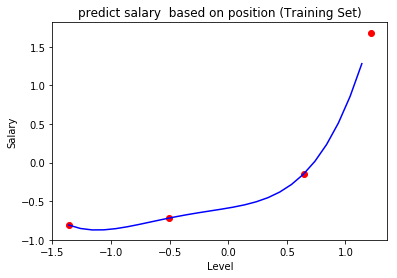

In [72]:
class Polynomial_regression:
    def predict_model(self,x_train,y_train):
          # getting prediction values on train dataset
        y_pred_train=lin_reg2.predict(poly_reg.fit_transform(x_train)) 
        return y_pred_train
   
    def pickle_file(self,lin_reg2):
        file =open("Polynomial.pkl","wb")
        pickle.dump(lin_reg2,file)
        file.close()
    
    def accuracy(self,y_train,y_pred_train):
        Accuracy = sklearn.metrics.r2_score(y_train,y_pred_train)*100
        return Accuracy
#         accuracy= mean_squared_error(y_train,y_pred_train)*100
#         return accuracy

    def visualization_train(self,x_train,y_train,y_pred_train):
        x_grid=np.arange(min(x_train),max(x_train),0.1)
        x_grid=x_grid.reshape((len(x_grid),1))
        plt.scatter(x_train,y_train,color='red')
        plt.plot(x_grid,lin_reg2.predict(poly_reg.fit_transform(x_grid)),color='blue')
        plt.title('predict salary  based on position (Training Set)')
        plt.xlabel('Level')
        plt.ylabel('Salary')
        plt.show()
              
def main():
    obj= Polynomial_regression()
    
#     obj.pickle_file(lin_reg2)
#     print("pickle file created")
    
    y_predict=obj.predict_model(x_train, y_train)
    print("y_predict train:",y_predict)
    
    accuracy=obj.accuracy(y_predict,y_train)
    print("accuracy of train data",accuracy)
    
    obj.visualization_train(x_train,y_train,y_predict)
    
if __name__ == '__main__':
    main()

y_predict train: [[-0.36172131]
 [ 0.4710132 ]
 [-0.79169603]]
accuracy of test data 65.00462361418118


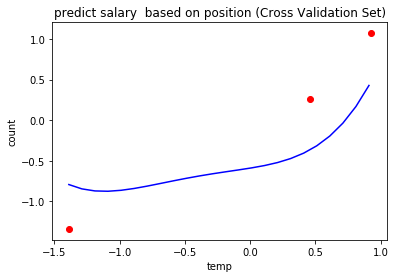

In [75]:
class cross_validation:
    def cross_validation_model(self,cv_data_x,cv_data_y):
        # getting prediction values cross validation dataset 
        y_pred=lin_reg2.predict(poly_reg.fit_transform(cv_data_x))
        return y_pred
   
    def accuracy(self,y_train,y_pred):
#         accuracy= mean_squared_error(cv_data_y,y_pred)*100
#         return accuracy
        Accuracy = sklearn.metrics.r2_score(y_train,y_pred)*100
        return Accuracy
    def visualization_test(self,cv_data_x,cv_data_y,y_pred_test):
        x_grid=np.arange(min(cv_data_x),max(cv_data_x),0.1)
        x_grid=x_grid.reshape((len(x_grid),1))
        plt.scatter(cv_data_x,cv_data_y,color='red')
        plt.plot(x_grid,lin_reg2.predict(poly_reg.fit_transform(x_grid)),color='blue')
        plt.title('predict salary  based on position (Cross Validation Set)')
        plt.xlabel('temp')
        plt.ylabel('count')
        plt.show()
def main():
    obj= cross_validation()


    y_predict=obj.cross_validation_model(cv_data_x, cv_data_y)
    print("y_predict train:",y_predict)

    accuracy=obj.accuracy(cv_data_y,y_predict)
    print("accuracy of test data",accuracy)

    obj.visualization_test(cv_data_x,cv_data_y,y_predict)

if __name__ == '__main__':
    main()